In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib as mpl

# customize matplotlib styles
mpl.rc('lines', linewidth=4) # default linewidth
mpl.rc('lines', dash_capstyle='round') # default dashed line capstyle
mpl.rc('lines', solid_capstyle='round') # default solid line capstyle
mpl.rc('xtick', labelsize=20) # default label size for xtick
mpl.rc('ytick', labelsize=20) # default label size for ytick
mpl.rc('axes', titlesize=30) # default title size
mpl.rc('axes', labelsize=25) # default label size for all axes
mpl.rc('legend', fontsize=20) # default fontsize for legends
mpl.rc('figure', titlesize=35) # default title size for figures with subplot

% matplotlib inline

# Definition of tube class

In [2]:
class tube:
    r = np.zeros((0,3))
    def __init__(self, coordinates):
        for node in coordinates:
            node = node.split(',')
            if (len(node) is 3):
                a = np.array([float(item) for item in node])
                a = a.reshape((1,3))
                self.r = np.concatenate((self.r, a), axis=0)
    
    def avg_y(self):
        return np.mean(self.r[:,1])
    def x(self):
        return self.r[:,0]
    def y(self):
        return self.r[:,1]
    def z(self):
        return self.r[:,2]

# Check height of tubes

In [5]:
directory = os.path.expanduser("~/research/cnt_mesh_fiber")

tubes = []

for i in range(1,100):
    filename = os.path.join(directory, "tube"+str(i)+".dat")
    if (not os.path.isfile(filename)):
        continue
    print("reading file: {}".format(filename))
    with open(filename) as file:
        for line in file:
            r = line.strip().split(";")
            r = r[1:]
            tubes.append(tube(r))

# make sure the last tube is stored and read properly
if (tubes[-1].r.shape!=tubes[0].r.shape): tubes.pop(-1)
            
print("number of tubes: {}".format(len(tubes)))
avg_y = np.array([tube.avg_y() for tube in tubes[:]])

avg_number_of_sections = np.mean([tube.r.shape[0] for tube in tubes])
print("average number of sections per tube: {}".format(int(avg_number_of_sections)))

reading file: /home/amirhossein/research/cnt_mesh_fiber/tube1.dat
number of tubes: 1877
average number of sections per tube: 16


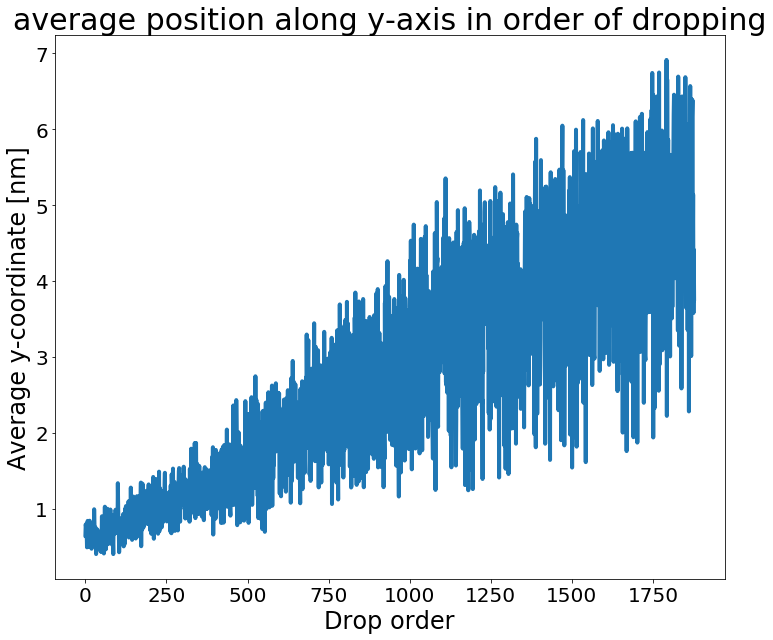

In [6]:
min_order, max_order = 0, len(tubes)
drop_order = np.linspace(min_order,max_order, max_order-min_order)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.plot(drop_order,avg_y[min_order:max_order], linewidth=4)
ax.set_title("average position along y-axis in order of dropping",fontsize=30)
ax.set_xlabel("Drop order",fontsize=24)
ax.set_ylabel("Average y-coordinate [nm]",fontsize=24)
ax.tick_params(labelsize=20)

# Draw individual CNTs in the container

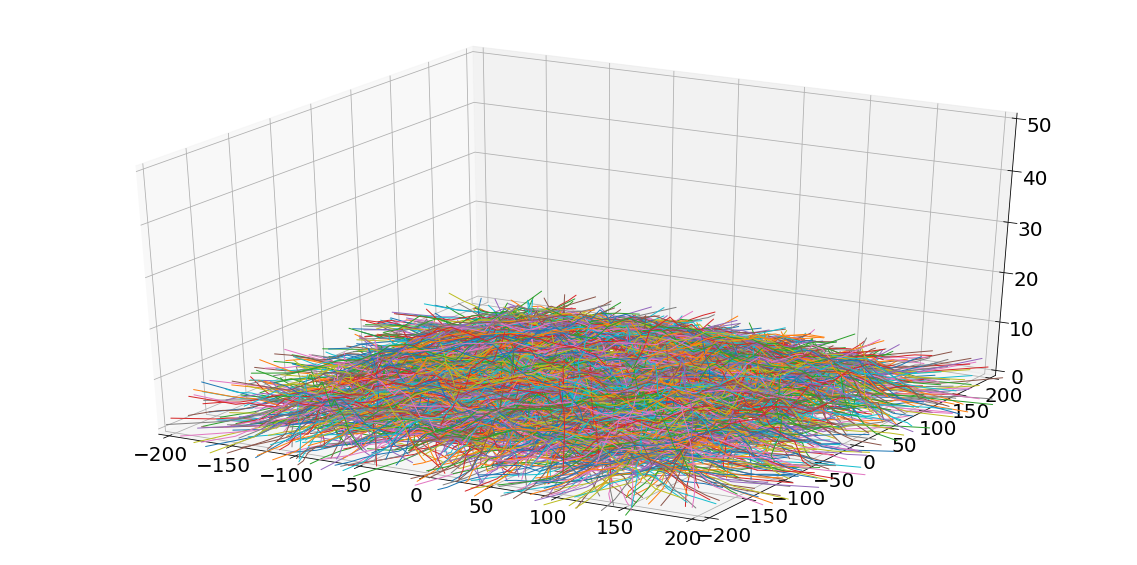

In [12]:
fig = plt.figure(figsize=(20,10))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111,projection='3d')
# ax.set_aspect('equal')

begin=0
n_tube=len(tubes)-1

for t in tubes[begin:begin+n_tube]:
    ax.plot(t.x(), t.z(), t.y(),linewidth=1)

ax.set_xlim([-200,200])
ax.set_ylim([-200,200])
_ = ax.set_zlim([0,50])